# Aggregation in Timeseries using Pandas
> Pandas excellence in timeseries!

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [visualisation]

We've all grown up studying groupy by and aggregations in SQL. Pandas provides excellent functionality for group by and aggregations. However, for time series data, we need a bit of manipulation. In this post, I'll take a small example of weather time series data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("weather.csv", index_col=0, parse_dates=True).tz_localize("UTC").tz_convert("US/Central")

In [3]:
df.head()

,humidity,temperature
2015-01-01 00:00:00-06:00,0.73,38.74
2015-01-01 01:00:00-06:00,0.74,38.56
2015-01-01 02:00:00-06:00,0.75,38.56
2015-01-01 03:00:00-06:00,0.79,37.97
2015-01-01 04:00:00-06:00,0.80,37.78


### Question 1: What is the mean temperature and humidity per hour of the day?

We'll create a new column in the df containing the hour information from the index.

In [4]:
df["hour"] = df.index.hour

In [5]:
df.head()

,humidity,temperature,hour
2015-01-01 00:00:00-06:00,0.73,38.74,0
2015-01-01 01:00:00-06:00,0.74,38.56,1
2015-01-01 02:00:00-06:00,0.75,38.56,2
2015-01-01 03:00:00-06:00,0.79,37.97,3
2015-01-01 04:00:00-06:00,0.80,37.78,4


In [6]:
mean_temp_humidity = df.groupby("hour").mean()
mean_temp_humidity.head()

,humidity,temperature
hour,,
0,0.779322,45.976441
1,0.803898,44.859492
2,0.812203,44.244407
3,0.819153,43.724068
4,0.832712,43.105763


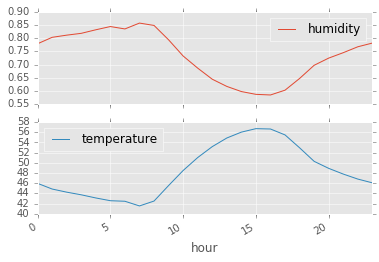

In [7]:
mean_temp_humidity.plot(subplots=True);

We can use pivoting to achieve the same dataframe.

In [8]:
mean_temp_humidity_pivoting = pd.pivot_table(df, index=["hour"], values=["temperature", "humidity"])

In [9]:
mean_temp_humidity_pivoting.head()

,humidity,temperature
hour,,
0,0.779322,45.976441
1,0.803898,44.859492
2,0.812203,44.244407
3,0.819153,43.724068
4,0.832712,43.105763


By default the aggregation function used in pivoting is mean.

### Question 2: Can we plot the daily variation in temperature per hour of the day?


For this, we want to have a dataframe with hour of day as the index and the different days as the different columns.

In [10]:
df["day"] = df.index.dayofyear

In [11]:
df.head()

,humidity,temperature,hour,day
2015-01-01 00:00:00-06:00,0.73,38.74,0,1
2015-01-01 01:00:00-06:00,0.74,38.56,1,1
2015-01-01 02:00:00-06:00,0.75,38.56,2,1
2015-01-01 03:00:00-06:00,0.79,37.97,3,1
2015-01-01 04:00:00-06:00,0.80,37.78,4,1


In [12]:
daily_temp = pd.pivot_table(df, index=["hour"], columns=["day"], values=["temperature"])

In [13]:
daily_temp.head()

temperature                                                          \
day           1      2      3      4      5      6      7      8      9    
hour                                                                       
0          38.74  39.94  39.57  41.83  33.95  36.98  46.93  29.95  36.57   
1          38.56  39.76  39.75  40.85  32.29  35.89  45.33  28.55  37.31   
2          38.56  39.58  39.94  39.73  31.59  36.44  44.51  27.44  37.78   
3          37.97  38.83  40.16  38.78  30.48  36.85  43.92  25.97  37.97   
4          37.78  39.02  40.65  39.74  29.89  35.72  44.37  24.74  37.82   

             ...                                                            \
day      10  ...       50     51     52     53     54     55     56     57   
hour         ...                                                             
0     36.19  ...    46.17  54.01  66.57  55.49  37.68  30.34  34.97  39.93   
1     36.40  ...    41.38  54.56  66.57  55.49  36.76  30.04  34.97  36.37   
2     36.59  ...    39.99  55.81  66.57  55.34  35.56  30.57  34.75  34.74   
3     36.38  ...    39.05  57.14  66.38  55.27  34.94  30.59  35.15  34.31   
4     35.49  ...    37.99  57.51  66.57  55.49  34.04  30.38  35.15  33.02   

                    
day      58     59  
hour                
0     36.19  32.25  
1     36.38  32.25  
2     36.20  32.25  
3     36.20  32.52  
4     34.49  32.52  

[5 rows x 59 columns]

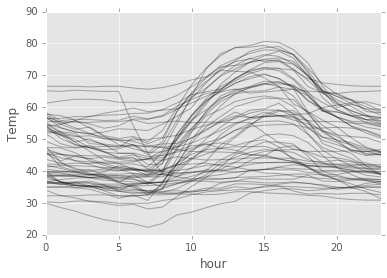

In [14]:
daily_temp.plot(style='k-', alpha=0.3, legend=False)
plt.ylabel("Temp");

So, we can see some pattern up there! Around 15 hours, the temperature usually peaks.

There you go! Some recipes for aggregation and plotting of time series data.